In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('/Users/sa22/Documents/code/Music_recommedation_algorithm/data/processed/transformed_dataset.csv')

df.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


In [4]:
test_df = pd.read_csv('/Users/sa22/Documents/code/Music_recommedation_algorithm/data/raw/recommend.csv')
test_df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429


# K-Means Clustering without scaling

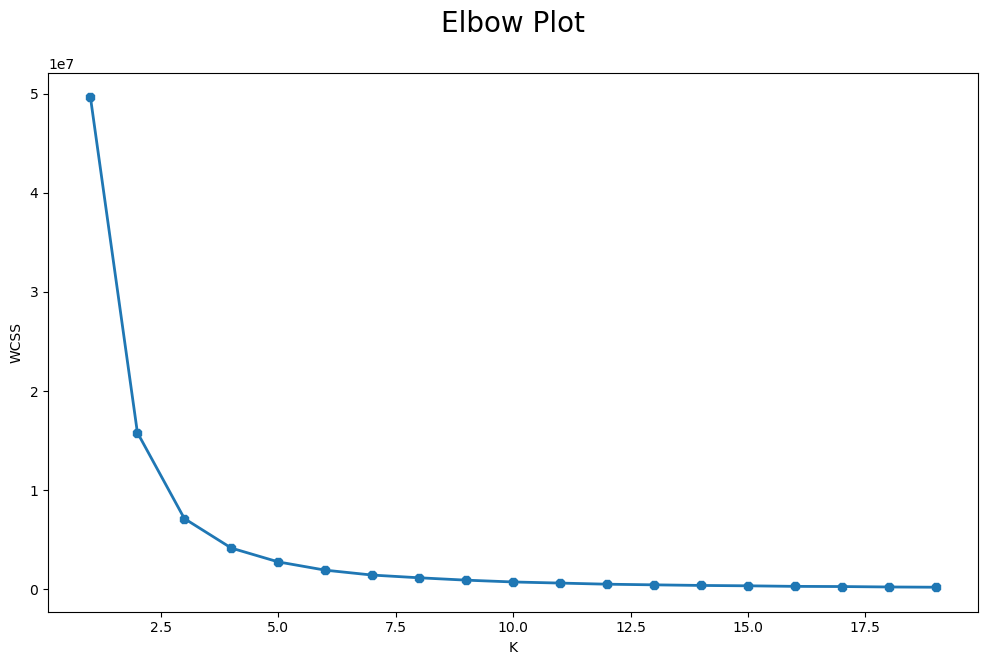

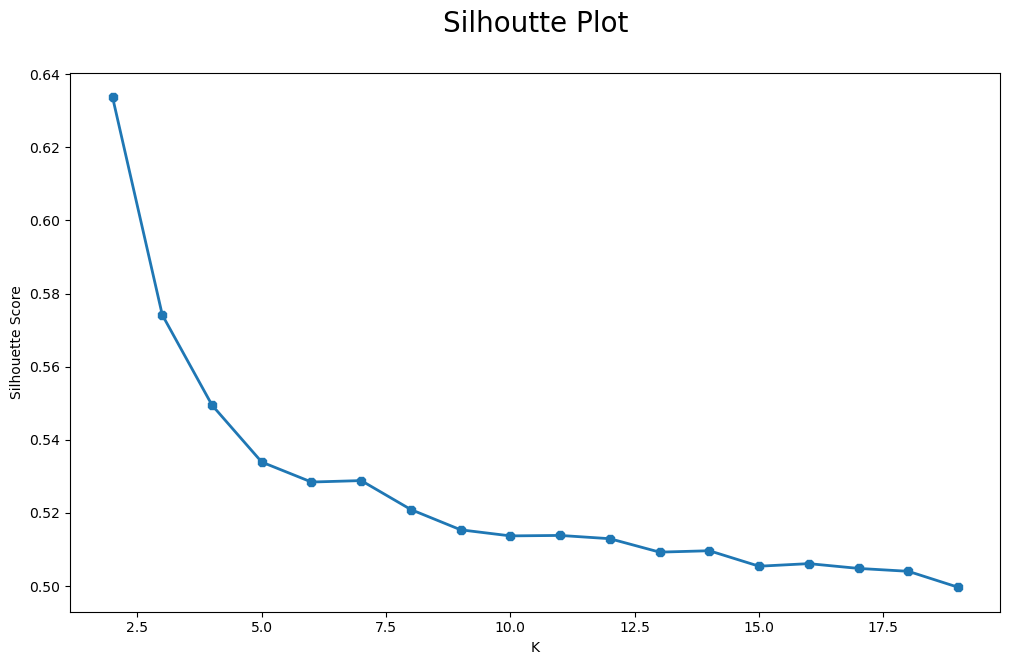

In [5]:
X1 = df.loc[:, ['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'age']].values

wcss = []

for k in range(1, 20):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

# create a plot of silhoutte score

silhouette = []
for k in range(2, 20):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

Based on this elbow and silhoutte plot, I'm gonna go with k = 4.

In [9]:
kmeans =  KMeans(n_clusters= 4, init = "k-means++" ,n_init= 20,  random_state= 42)

# Fit the KMeans model to the dataset X1
kmeans.fit(X1)

KMeans(n_clusters=4, n_init=20, random_state=42)

In [10]:
labels = kmeans.fit_predict(X1)
labels

array([0, 1, 1, ..., 3, 3, 3], dtype=int32)

In [11]:
kmeans.cluster_centers_

array([[1.05784855e+02, 2.04270215e-02, 1.47056391e-01, 1.04572781e-01,
        5.56767163e-02, 2.15281611e-02, 1.81005471e-02, 3.10296776e-02,
        7.16415553e-02, 1.24452357e-01, 5.29636816e-02, 5.93765343e-02,
        4.63353649e-02, 2.53211300e-02, 1.04296113e-01, 3.11464827e-02,
        3.44542016e-01],
       [3.53326558e+01, 2.15363385e-02, 9.54333285e-02, 1.40876671e-01,
        6.13075408e-02, 1.36314603e-02, 1.63487401e-02, 7.16464788e-02,
        8.23656639e-02, 4.25134088e-02, 7.05007061e-02, 3.20482314e-02,
        5.19630790e-02, 2.39092427e-02, 1.58888631e-01, 3.29265759e-02,
        5.03005918e-01],
       [1.65540353e+02, 1.78918404e-02, 1.12138592e-01, 7.21925890e-02,
        3.68788963e-02, 2.50139369e-02, 1.63031157e-02, 1.73753154e-02,
        6.31760791e-02, 3.22147609e-01, 3.50270579e-02, 6.75758599e-02,
        3.48090305e-02, 2.29507973e-02, 4.41194345e-02, 2.46066513e-02,
        3.03374734e-01],
       [6.74374872e+01, 2.19893577e-02, 1.28642073e-01, 1.234

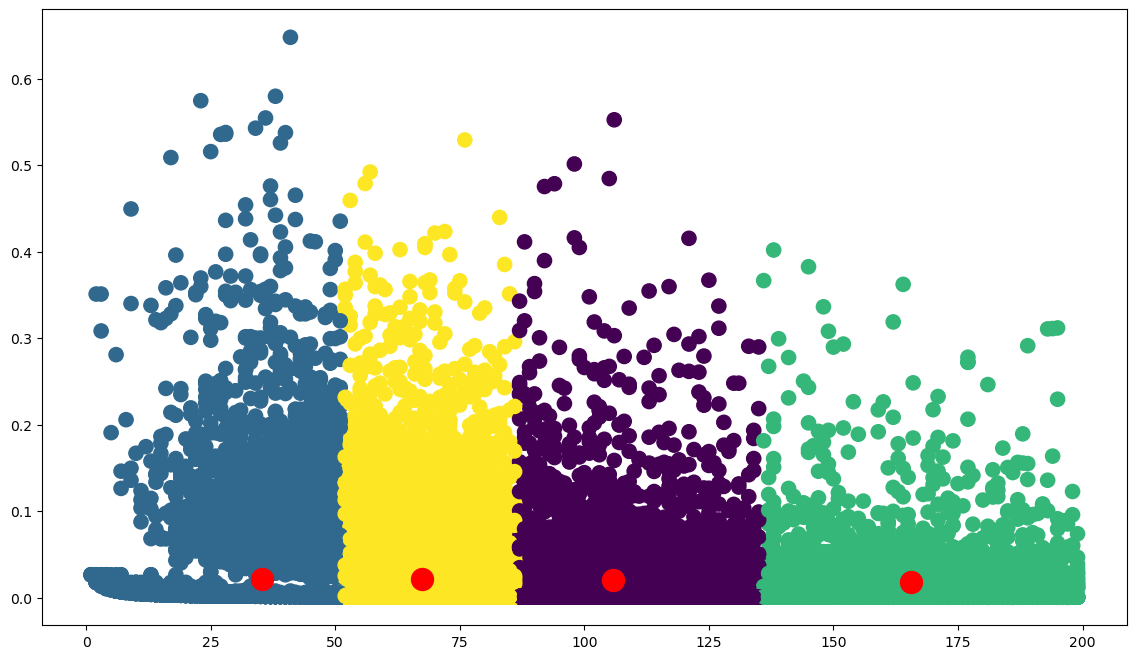

In [13]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.show()

This chart shows some categories but the clusters make this a mess to look at.

# K-Means Clustering with scaling